<a href="https://colab.research.google.com/github/Heoyuna0819/deeplearning/blob/main/DL_regression_ablone_retry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

file_path = "/content/drive/MyDrive/abalone.csv"
df = pd.read_csv(file_path)
df


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [15]:
# LabelEncoder 초기화
label_encoder = LabelEncoder()

# 특정 컬럼만 인코딩
columns_to_encode = ['Sex']

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [16]:
#불필요한 칼람 제거
df=df.drop(columns=['id'])
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [17]:
X=df.drop('Rings',axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [18]:
y=df['Rings']
y.head()

,Rings
0,15
1,7
2,9
3,10
4,7


In [19]:
Y = pd.get_dummies(y).values
X = X.values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3341, 8), (836, 8), (3341, 28), (836, 28))

In [20]:
from sklearn.preprocessing import StandardScaler

# 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(8,),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))

model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 531 (2.07 KB)

 Trainable params: 531 (2.07 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

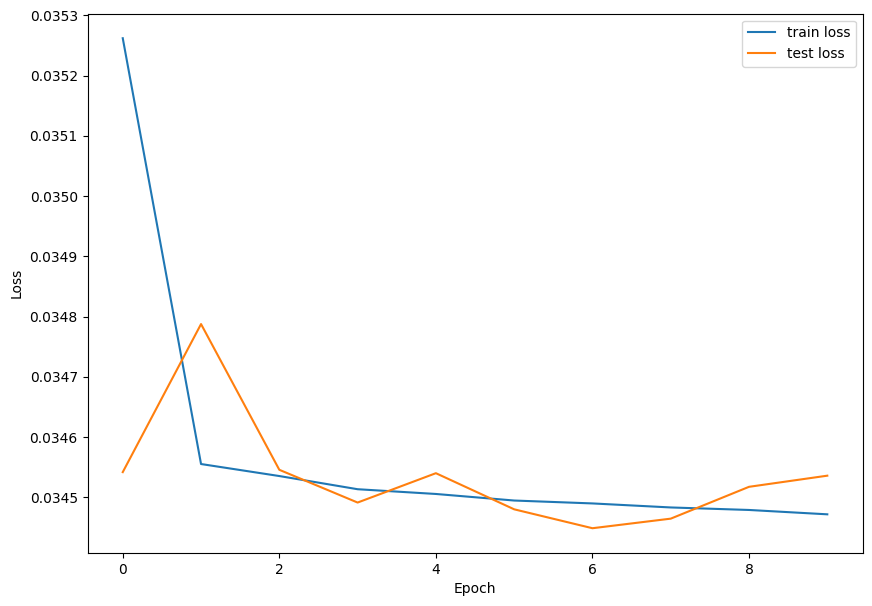

In [30]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
#성능평가
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0345 - mse: 0.0345 


[0.03453584387898445, 0.03453584387898445]